# 대전광역시 CCTV 현황분석

In [3]:
import numpy as np
import pandas as pd

In [28]:
import googlemaps
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import json
import folium

%matplotlib inline
sns.set()

In [29]:
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname = path).get_name()
    rc('font', family = font_name)
else:
    print('Unknown system...')

## 행정구역별 파일 불러오기 및 데이터 프레임 생성

In [39]:
서구_cctv= pd.read_csv("대전광역시_서구_CCTV_20190106.csv", encoding="CP949")
서구_cctv.head()

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치년월,관리기관전화번호,위도,경도,데이터기준일자
0,대전광역시 서구청,대전광역시 서구 오량1길 40(복수동),대전광역시 서구 복수동 283-38 해피플러스 앞,쓰레기단속,1,NaN,NaN,5,2017-11,042-288-3574,36.310448,127.375772,2019-01-04
1,대전광역시 서구청,대전광역시 서구 복수동 781(복수동),대전광역시 서구 복수동 781 공영주차장 옆,쓰레기단속,1,NaN,NaN,5,2018-05,042-288-3574,36.297749,127.378139,2019-01-04
2,대전광역시 서구청,대전광역시 서구 복수동로 96-19(복수동),대전광역시 서구 복수동 812 해운빌딩 옆,쓰레기단속,1,NaN,NaN,5,2018-05,042-288-3574,36.296489,127.376259,2019-01-04
3,대전광역시 서구청,대전광역시 서구 복수동로88번길 20(복수동),대전광역시 서구 복수동 762 해피하우스 옆,쓰레기단속,1,NaN,NaN,5,2018-05,042-288-3574,36.297309,127.376582,2019-01-04
4,대전광역시 서구청,대전광역시 서구 복수동로52번길 140(복수동),대전광역시 서구 복수동 556 에메니티빌 앞,쓰레기단속,1,NaN,NaN,5,2018-05,042-288-3574,36.299706,127.374451,2019-01-04


In [40]:
서구_cctv1 = pd.DataFrame(서구_cctv,columns=['관리기관명', '설치목적구분', '카메라대수', '위도', '경도'])
서구_cctv1.head()

,관리기관명,설치목적구분,카메라대수,위도,경도
0,대전광역시 서구청,쓰레기단속,1,36.310448,127.375772
1,대전광역시 서구청,쓰레기단속,1,36.297749,127.378139
2,대전광역시 서구청,쓰레기단속,1,36.296489,127.376259
3,대전광역시 서구청,쓰레기단속,1,36.297309,127.376582
4,대전광역시 서구청,쓰레기단속,1,36.299706,127.374451


In [10]:
동구_cctv= pd.read_csv("대전광역시_동구_CCTV_20190321.csv", encoding="CP949")
동구_cctv.head()

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치년월,관리기관전화번호,위도,경도,데이터기준일자
0,대전광역시 동구,대전광역시 동구 계족로446번길 19(용전동),NaN,생활방범,1,200,NaN,30,2008-08,042-251-4173,36.351339,127.433575,2019-03-21
1,대전광역시 동구,대전광역시 동구 계족로 459(용전동),NaN,생활방범,1,200,NaN,30,2008-08,042-251-4173,36.352627,127.431277,2019-03-21
2,대전광역시 동구,대전광역시 동구 동서대로1678번길 38(성남동),NaN,생활방범,1,200,NaN,30,2008-08,042-251-4173,36.347003,127.436489,2019-03-21
3,대전광역시 동구,대전광역시 동구 한남로7번길 22(홍도동),NaN,생활방범,1,200,NaN,30,2008-08,042-251-4173,36.350232,127.427749,2019-03-21
4,대전광역시 동구,대전광역시 동구 태전로 146(삼성동),NaN,생활방범,1,200,NaN,30,2008-08,042-251-4173,36.340992,127.420782,2019-03-21


In [11]:
동구_cctv1 = pd.DataFrame(동구_cctv,columns=['관리기관명', '설치목적구분', '카메라대수', '위도', '경도'])
동구_cctv1.head()

,관리기관명,설치목적구분,카메라대수,위도,경도
0,대전광역시 동구,생활방범,1,36.351339,127.433575
1,대전광역시 동구,생활방범,1,36.352627,127.431277
2,대전광역시 동구,생활방범,1,36.347003,127.436489
3,대전광역시 동구,생활방범,1,36.350232,127.427749
4,대전광역시 동구,생활방범,1,36.340992,127.420782


In [12]:
중구_cctv= pd.read_csv("대전광역시_중구_CCTV_20190527.csv", encoding="CP949")
중구_cctv.head()

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치년월,관리기관전화번호,위도,경도,데이터기준일자
0,대전광역시 중구청,대전광역시 중구 대종로199번길41(호동),대전광역시 중구 호동240-9,생활방범,1,200,우리들공원,30,2008-01,042-606-6090,36.327047,127.425791,2019-05-27
1,대전광역시 중구청,대전광역시 중구 대전천서로127(호동),대전광역시 중구 호동16-1,생활방범,1,200,대전여중 옆,30,2008-01,042-606-6090,36.324193,127.426032,2019-05-27
2,대전광역시 중구청,대전광역시 중구 범골로95번길13(호동),대전광역시 중구 호동152,생활방범,1,200,중구선거관리위원회뒤,30,2008-01,042-606-6090,36.331124,127.423780,2019-05-27
3,대전광역시 중구청,대전광역시 중구 모암로30번길 10(호동),대전광역시 중구 호동 80-6,생활방범,1,130,舊 선화2동 청사 앞,30,2008-01,042-606-6090,36.335038,127.416990,2019-05-27
4,대전광역시 중구청,대전광역시 중구 모암로24번길 1(호동),대전광역시 중구 호동 80-3,생활방범,1,200,대흥초등학교 정문,30,2008-08,042-606-6090,36.320101,127.425836,2019-05-27


In [13]:
중구_cctv1 = pd.DataFrame(중구_cctv,columns=['관리기관명', '설치목적구분', '카메라대수', '위도', '경도'])
중구_cctv1.head()

,관리기관명,설치목적구분,카메라대수,위도,경도
0,대전광역시 중구청,생활방범,1,36.327047,127.425791
1,대전광역시 중구청,생활방범,1,36.324193,127.426032
2,대전광역시 중구청,생활방범,1,36.331124,127.423780
3,대전광역시 중구청,생활방범,1,36.335038,127.416990
4,대전광역시 중구청,생활방범,1,36.320101,127.425836


In [14]:
유성구_cctv= pd.read_csv("대전광역시_유성구_CCTV_20190520.csv", encoding="CP949")
유성구_cctv.head()

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치년월,관리기관전화번호,위도,경도,데이터기준일자
0,유성구청,NaN,대전광역시 유성구 구암동 598-1,생활방범,1,200,360°,30,2008-02,042-611-2114,36.353779,127.332868,2019-05-20
1,유성구청,NaN,대전광역시 유성구 구암동 619-1,생활방범,1,200,360°,30,2008-02,042-611-2114,36.350180,127.331511,2019-05-20
2,유성구청,NaN,대전광역시 유성구 장대동 317-5,생활방범,1,200,360°,30,2008-02,042-611-2114,36.364591,127.339741,2019-05-20
3,유성구청,NaN,대전광역시 유성구 궁동 1-11,생활방범,1,200,360°,30,2008-02,042-611-2114,36.363951,127.352044,2019-05-20
4,유성구청,NaN,대전광역시 유성구 궁동 417-7,생활방범,1,200,360°,30,2008-02,042-611-2114,36.361459,127.347978,2019-05-20


In [15]:
유성구_cctv1 = pd.DataFrame(유성구_cctv,columns=['관리기관명', '설치목적구분', '카메라대수', '위도', '경도'])
유성구_cctv1.head()

,관리기관명,설치목적구분,카메라대수,위도,경도
0,유성구청,생활방범,1,36.353779,127.332868
1,유성구청,생활방범,1,36.350180,127.331511
2,유성구청,생활방범,1,36.364591,127.339741
3,유성구청,생활방범,1,36.363951,127.352044
4,유성구청,생활방범,1,36.361459,127.347978


In [16]:
대덕구_cctv= pd.read_csv("대전광역시_대덕구_CCTV_20190331.csv", encoding="CP949")
대덕구_cctv.head()

,관리기관명,소재지도로명주소,소재지지번주소,설치목적구분,카메라대수,카메라화소수,촬영방면정보,보관일수,설치년월,관리기관전화번호,위도,경도,데이터기준일자
0,대전광역시 대덕구청,대전광역시 대덕구 비래서로61번길 35,대전광역시 대덕구 비래동 138-4,생활방범,1,240,NaN,30.0,08-Aug,042-608-6097,36.355991,127.452253,2019-03-31
1,대전광역시 대덕구청,대전광역시 대덕구 옛신탄진로151번길 11,대전광역시 대덕구 오정동 435-14,생활방범,1,240,NaN,30.0,08-Aug,042-608-6097,36.352678,127.417440,2019-03-31
2,대전광역시 대덕구청,대전광역시 대덕구 대전로1066번길 35,대전광역시 대덕구 오정동 441-12,생활방범,2,240,NaN,30.0,18-Aug,042-608-6097,36.350281,127.417418,2019-03-31
3,대전광역시 대덕구청,대전광역시 대덕구 중리남로27번길 11,대전광역시 대덕구 중리동 195-1,생활방범,1,240,NaN,30.0,08-Aug,042-608-6097,36.360539,127.428727,2019-03-31
4,대전광역시 대덕구청,대전광역시 대덕구 중리남로 45,대전광역시 대덕구 중리동 207-2,생활방범,1,240,NaN,30.0,08-Aug,042-608-6097,36.360795,127.426761,2019-03-31


In [17]:
대덕구_cctv1 = pd.DataFrame(대덕구_cctv,columns=['관리기관명', '설치목적구분', '카메라대수', '위도', '경도'])
대덕구_cctv1.head()

,관리기관명,설치목적구분,카메라대수,위도,경도
0,대전광역시 대덕구청,생활방범,1,36.355991,127.452253
1,대전광역시 대덕구청,생활방범,1,36.352678,127.417440
2,대전광역시 대덕구청,생활방범,2,36.350281,127.417418
3,대전광역시 대덕구청,생활방범,1,36.360539,127.428727
4,대전광역시 대덕구청,생활방범,1,36.360795,127.426761


## 데이터 병합

In [18]:
대전_cctv = pd.concat([서구_cctv1, 동구_cctv1, 중구_cctv1, 유성구_cctv1, 대덕구_cctv1])
대전_cctv

,관리기관명,설치목적구분,카메라대수,위도,경도
0,대전광역시 서구청,생활방범,1,36.352083,127.364826
1,대전광역시 서구청,생활방범,1,36.348895,127.372887
2,대전광역시 서구청,생활방범,1,36.300451,127.335206
3,대전광역시 서구청,생활방범,2,36.340674,127.388711
4,대전광역시 서구청,생활방범,1,36.342562,127.376520
5,대전광역시 서구청,생활방범,1,36.316695,127.372328
6,대전광역시 서구청,생활방범,1,36.342031,127.401156
7,대전광역시 서구청,생활방범,1,36.355474,127.360709
8,대전광역시 서구청,생활방범,1,36.354176,127.370303
9,대전광역시 서구청,생활방범,1,36.347594,127.372464


## 행정 구역별 설치 목적구분 확인 

In [41]:
서구목적 = []
가 = 서구_cctv1[서구_cctv1['설치목적구분'] == '생활방범']
서구목적.append(가['카메라대수'].sum())

나 = 서구_cctv1[서구_cctv1['설치목적구분'] == '교통단속']
서구목적.append(나['카메라대수'].sum())

다 = 서구_cctv1[서구_cctv1['설치목적구분'] == '시설물관리']
서구목적.append(다['카메라대수'].sum())

라 = 서구_cctv1[서구_cctv1['설치목적구분'] == '쓰레기단속']
서구목적.append(라['카메라대수'].sum())

마 = 서구_cctv1[서구_cctv1['설치목적구분'] == '어린이보호']
서구목적.append(마['카메라대수'].sum())

바 = 서구_cctv1[서구_cctv1['설치목적구분'] == '재난재해']
서구목적.append(바['카메라대수'].sum())

사 = 서구_cctv1[서구_cctv1['설치목적구분'] == '차량방범']
서구목적.append(사['카메라대수'].sum())

아 = 서구_cctv1[서구_cctv1['설치목적구분'] == '교통정보수집']
서구목적.append(아['카메라대수'].sum())

자 = 서구_cctv1[서구_cctv1['설치목적구분'] == '기타']
서구목적.append(자['카메라대수'].sum())
서구목적

[981, 149, 0, 86, 0, 0, 0, 0, 0]

In [21]:
동구목적 = []
가 = 동구_cctv1[동구_cctv1['설치목적구분'] == '생활방범']
동구목적.append(가['카메라대수'].sum())

나 = 동구_cctv1[동구_cctv1['설치목적구분'] == '교통단속']
동구목적.append(나['카메라대수'].sum())

다 = 동구_cctv1[동구_cctv1['설치목적구분'] == '시설물관리']
동구목적.append(다['카메라대수'].sum())

라 = 동구_cctv1[동구_cctv1['설치목적구분'] == '쓰레기단속']
동구목적.append(라['카메라대수'].sum())

마 = 동구_cctv1[동구_cctv1['설치목적구분'] == '어린이보호']
동구목적.append(마['카메라대수'].sum())

바 = 동구_cctv1[동구_cctv1['설치목적구분'] == '재난재해']
동구목적.append(바['카메라대수'].sum())

사 = 동구_cctv1[동구_cctv1['설치목적구분'] == '차량방범']
동구목적.append(사['카메라대수'].sum())

아 = 동구_cctv1[동구_cctv1['설치목적구분'] == '교통정보수집']
동구목적.append(아['카메라대수'].sum())

자 = 동구_cctv1[동구_cctv1['설치목적구분'] == '기타']
동구목적.append(자['카메라대수'].sum())
동구목적

[717, 0, 0, 0, 0, 0, 0, 0, 0]

In [22]:
중구목적 = []
가 = 중구_cctv1[중구_cctv1['설치목적구분'] == '생활방범']
중구목적.append(가['카메라대수'].sum())

나 = 중구_cctv1[중구_cctv1['설치목적구분'] == '교통단속']
중구목적.append(나['카메라대수'].sum())

다 = 중구_cctv1[중구_cctv1['설치목적구분'] == '시설물관리']
중구목적.append(다['카메라대수'].sum())

라 = 중구_cctv1[중구_cctv1['설치목적구분'] == '쓰레기단속']
중구목적.append(라['카메라대수'].sum())

마 = 중구_cctv1[중구_cctv1['설치목적구분'] == '어린이보호']
중구목적.append(마['카메라대수'].sum())

바 = 중구_cctv1[중구_cctv1['설치목적구분'] == '재난재해']
중구목적.append(바['카메라대수'].sum())

사 = 중구_cctv1[중구_cctv1['설치목적구분'] == '차량방범']
중구목적.append(사['카메라대수'].sum())

아 = 중구_cctv1[중구_cctv1['설치목적구분'] == '교통정보수집']
중구목적.append(아['카메라대수'].sum())

자 = 중구_cctv1[중구_cctv1['설치목적구분'] == '기타']
중구목적.append(자['카메라대수'].sum())
중구목적

[846, 0, 0, 0, 0, 0, 8, 0, 0]

In [23]:
유성구목적 = []
가 = 유성구_cctv1[유성구_cctv1['설치목적구분'] == '생활방범']
유성구목적.append(가['카메라대수'].sum())

나 = 유성구_cctv1[유성구_cctv1['설치목적구분'] == '교통단속']
유성구목적.append(나['카메라대수'].sum())

다 = 유성구_cctv1[유성구_cctv1['설치목적구분'] == '시설물관리']
유성구목적.append(다['카메라대수'].sum())

라 = 유성구_cctv1[유성구_cctv1['설치목적구분'] == '쓰레기단속']
유성구목적.append(라['카메라대수'].sum())

마 = 유성구_cctv1[유성구_cctv1['설치목적구분'] == '어린이보호']
유성구목적.append(마['카메라대수'].sum())

바 = 유성구_cctv1[유성구_cctv1['설치목적구분'] == '재난재해']
유성구목적.append(바['카메라대수'].sum())

사 = 유성구_cctv1[유성구_cctv1['설치목적구분'] == '차량방범']
유성구목적.append(사['카메라대수'].sum())

아 = 유성구_cctv1[유성구_cctv1['설치목적구분'] == '교통정보수집']
유성구목적.append(아['카메라대수'].sum())

자 = 유성구_cctv1[유성구_cctv1['설치목적구분'] == '기타']
유성구목적.append(자['카메라대수'].sum())
유성구목적

[803, 0, 0, 0, 0, 0, 52, 0, 0]

In [24]:
대덕구목적 = []
가 = 대덕구_cctv1[대덕구_cctv1['설치목적구분'] == '생활방범']
대덕구목적.append(가['카메라대수'].sum())

나 = 대덕구_cctv1[대덕구_cctv1['설치목적구분'] == '교통단속']
대덕구목적.append(나['카메라대수'].sum())

다 = 대덕구_cctv1[대덕구_cctv1['설치목적구분'] == '시설물관리']
대덕구목적.append(다['카메라대수'].sum())

라 = 대덕구_cctv1[대덕구_cctv1['설치목적구분'] == '쓰레기단속']
대덕구목적.append(라['카메라대수'].sum())

마 = 대덕구_cctv1[대덕구_cctv1['설치목적구분'] == '어린이보호']
대덕구목적.append(마['카메라대수'].sum())

바 = 대덕구_cctv1[대덕구_cctv1['설치목적구분'] == '재난재해']
대덕구목적.append(바['카메라대수'].sum())

사 = 대덕구_cctv1[대덕구_cctv1['설치목적구분'] == '차량방범']
대덕구목적.append(사['카메라대수'].sum())

아 = 대덕구_cctv1[대덕구_cctv1['설치목적구분'] == '교통정보수집']
대덕구목적.append(아['카메라대수'].sum())

자 = 대덕구_cctv1[대덕구_cctv1['설치목적구분'] == '기타']
대덕구목적.append(자['카메라대수'].sum())
대덕구목적

[390, 30, 50, 20, 379, 4, 43, 0, 0]

In [46]:
df_서구 = pd.DataFrame(서구목적, index=['생활방범','교통단속','시설물관리','쓰레기단속', ' 어린이보호', '재난재해', '차량방범',
                            '교통정보수집', '기타'], columns=['cctv 개수'])
df_서구.index.name = '서구 설치목적구분'

df_동구 = pd.DataFrame(동구목적, index=['생활방범','교통단속','시설물관리','쓰레기단속', ' 어린이보호', '재난재해', '차량방범',
                            '교통정보수집', '기타'], columns=['cctv 개수'])
df_동구.index.name = '동구 설치목적구분'

df_중구 = pd.DataFrame(중구목적, index=['생활방범','교통단속','시설물관리','쓰레기단속', ' 어린이보호', '재난재해', '차량방범',
                            '교통정보수집', '기타'], columns=['cctv 개수'])
df_중구.index.name = '중구 설치목적구분'

df_유성구 = pd.DataFrame(유성구목적, index=['생활방범','교통단속','시설물관리','쓰레기단속', ' 어린이보호', '재난재해', '차량방범',
                            '교통정보수집', '기타'], columns=['cctv 개수'])
df_유성구.index.name = '유성구 설치목적구분'

df_대덕구 = pd.DataFrame(대덕구목적, index=['생활방범','교통단속','시설물관리','쓰레기단속', ' 어린이보호', '재난재해', '차량방범',
                            '교통정보수집', '기타'], columns=['cctv 개수'])
df_대덕구.index.name = '대덕구 설치목적구분'

In [70]:
df_대덕구 

,cctv 개수
대덕구 설치목적구분,
생활방범,390
교통단속,30
시설물관리,50
쓰레기단속,20
어린이보호,379
재난재해,4
차량방범,43
교통정보수집,0
기타,0


In [66]:
df_서구

,cctv 개수
서구 설치목적구분,
생활방범,981
교통단속,149
시설물관리,0
쓰레기단속,86
어린이보호,0
재난재해,0
차량방범,0
교통정보수집,0
기타,0


In [67]:
df_동구

,cctv 개수
동구 설치목적구분,
생활방범,717
교통단속,0
시설물관리,0
쓰레기단속,0
어린이보호,0
재난재해,0
차량방범,0
교통정보수집,0
기타,0


In [68]:
df_중구

,cctv 개수
중구 설치목적구분,
생활방범,846
교통단속,0
시설물관리,0
쓰레기단속,0
어린이보호,0
재난재해,0
차량방범,8
교통정보수집,0
기타,0


In [69]:
df_유성구 

,cctv 개수
유성구 설치목적구분,
생활방범,803
교통단속,0
시설물관리,0
쓰레기단속,0
어린이보호,0
재난재해,0
차량방범,52
교통정보수집,0
기타,0


## 서구 CCTV 설치목적구분 시각화 및 서구 어린이보호구역 데이터와 비교

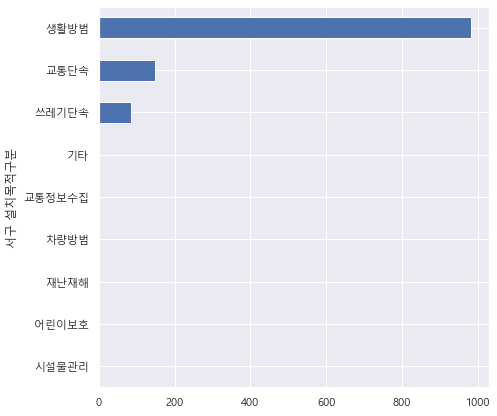

In [50]:
plt.figure()
df_서구['cctv 개수'].sort_values().plot(kind = 'barh',
                                       grid = True,figsize = (7, 7),color = 'b')
plt.show()

In [58]:
서구어린이_cctv= pd.read_csv("대전광역시_서구_어린이보호구역_20190219.csv", encoding="CP949")
서구어린이_cctv.head()

,시설종류,대상시설명,소재지도로명주소,소재지지번주소,위도,경도,관리기관명,관할경찰서명,CCTV설치여부,CCTV설치대수,보호구역도로폭,데이터기준일자
0,초등학교,갑천초등학교,대전광역시 서구 월평동로61,NaN,36.360792,127.367695,대전광역시 서구청,둔산경찰서,Y,2,6~20,2019-02-19
1,초등학교,둔산초등학교,대전광역시 서구 둔산로74번길20,NaN,36.350161,127.381449,대전광역시 서구청,둔산경찰서,Y,2,6~20,2019-02-19
2,초등학교,성천초등학교,대전광역시 서구 갈마역로139,NaN,36.363235,127.373547,대전광역시 서구청,둔산경찰서,Y,2,6~20,2019-02-19
3,초등학교,정림초등학교,대전광역시 서구 정림로32,NaN,36.303648,127.366553,대전광역시 서구청,서부경찰서,Y,2,6~20,2019-02-19
4,초등학교,가수원초등학교,대전광역시 서구 벌곡로 1359,NaN,36.302773,127.352802,대전광역시 서구청,서부경찰서,Y,1,6~20,2019-02-19


In [71]:
서구어린이_cctv1 = pd.DataFrame(서구어린이_cctv,columns=['관리기관명','관할경찰서명','대상시설명','소재지도로명주소','CCTV설치여부','CCTV설치대수','데이터기준일자'])
서구어린이_cctv1.head()

,관리기관명,관할경찰서명,대상시설명,소재지도로명주소,CCTV설치여부,CCTV설치대수,데이터기준일자
0,대전광역시 서구청,둔산경찰서,갑천초등학교,대전광역시 서구 월평동로61,Y,2,2019-02-19
1,대전광역시 서구청,둔산경찰서,둔산초등학교,대전광역시 서구 둔산로74번길20,Y,2,2019-02-19
2,대전광역시 서구청,둔산경찰서,성천초등학교,대전광역시 서구 갈마역로139,Y,2,2019-02-19
3,대전광역시 서구청,서부경찰서,정림초등학교,대전광역시 서구 정림로32,Y,2,2019-02-19
4,대전광역시 서구청,서부경찰서,가수원초등학교,대전광역시 서구 벌곡로 1359,Y,1,2019-02-19


In [80]:
서구_cctv2 = pd.DataFrame(서구_cctv,columns=['관리기관명','소재지도로명주소', '설치목적구분', '데이터기준일자'])
서구_cctv2.head()

,관리기관명,소재지도로명주소,설치목적구분,데이터기준일자
0,대전광역시 서구청,대전광역시 서구 오량1길 40(복수동),쓰레기단속,2019-01-04
1,대전광역시 서구청,대전광역시 서구 복수동 781(복수동),쓰레기단속,2019-01-04
2,대전광역시 서구청,대전광역시 서구 복수동로 96-19(복수동),쓰레기단속,2019-01-04
3,대전광역시 서구청,대전광역시 서구 복수동로88번길 20(복수동),쓰레기단속,2019-01-04
4,대전광역시 서구청,대전광역시 서구 복수동로52번길 140(복수동),쓰레기단속,2019-01-04


In [79]:
서구_cctv2.loc[373]

관리기관명                   대전광역시 서구청
소재지도로명주소    대전광역시 서구 월평동로 61(월평동)
설치목적구분                       생활방범
데이터기준일자                2019-01-04
Name: 373, dtype: object

## 서구제외 나머지 행정구역 CCTV설치목적구분 시각화

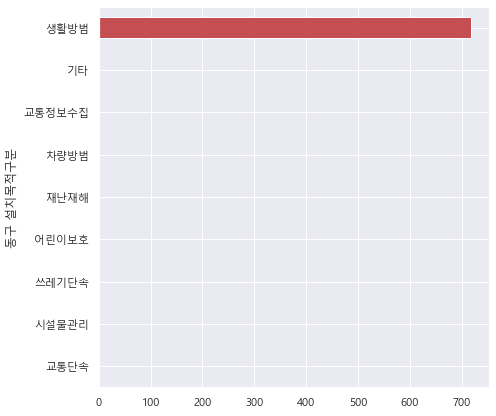

In [52]:
plt.figure()
df_동구['cctv 개수'].sort_values().plot(kind = 'barh',
                                       grid = True,figsize = (7, 7),color = 'r')
plt.show()

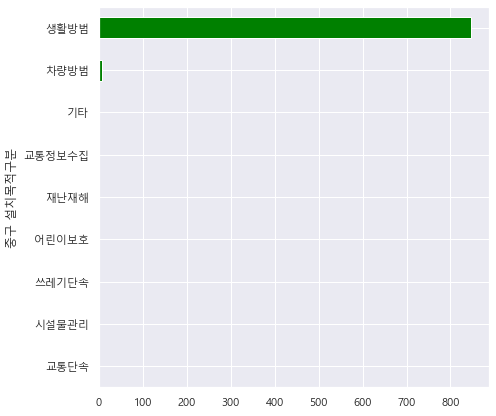

In [54]:
plt.figure()
df_중구['cctv 개수'].sort_values().plot(kind = 'barh',
                                       grid = True,figsize = (7, 7),color = 'green')
plt.show()

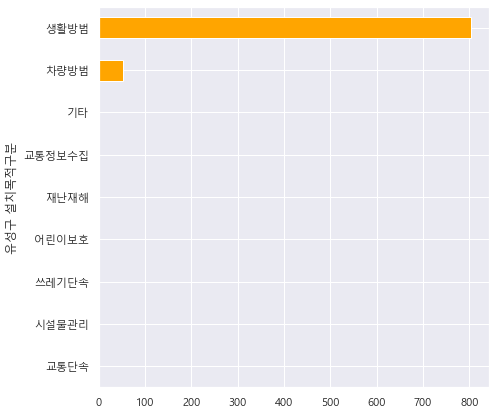

In [55]:
plt.figure()
df_유성구['cctv 개수'].sort_values().plot(kind = 'barh',
                                       grid = True,figsize = (7, 7),color = 'orange')
plt.show()

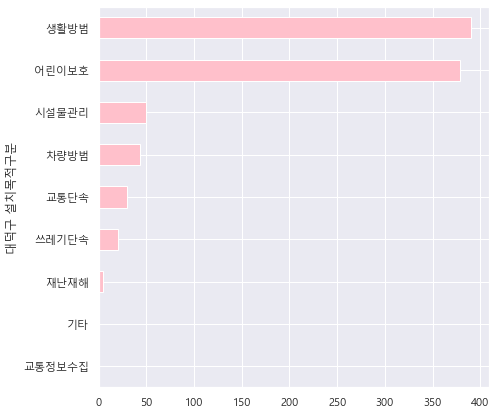

In [57]:
plt.figure()
df_대덕구['cctv 개수'].sort_values().plot(kind = 'barh',
                                       grid = True,figsize = (7, 7),color = 'pink')
plt.show()

# 대덕구청을 제외한 각 구청에선 CCTV현황 데이터를 작성할 때 설치목적을 더욱 명확히 구분하여 작성할 것이 요구됨.